<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/keras_examples/BatchNormExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Resource: https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

# Batch normalization is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network.

In [2]:
# Keras provides support for batch normalization via the BatchNormalization layer.
# Example: bn = BatchNormalization()

# The layer will transform inputs so that they are standardized, meaning that they will have a mean of zero and a 
# standard deviation of one.

# During training, the layer will keep track of statistics for each input variable and use them to standardize the data.

# Further, the standardized output can be rescaled using the learned parameters of Beta and Gamma that define the new mean
# and standard deviation for the output of the transform. The layer can be configured to control whether these additional 
# parameters will be used or not via the “center” and “scale” attributes respectively. By default, they are enabled.

# The statistics used to perform the standardization,
#  e.g. the mean and standard deviation of each variable, are updated for each mini batch and a running average is maintained.

In [3]:
# A “momentum” argument allows you to control how much of the statistics from the previous mini batch to include when the 
# update is calculated. By default, this is kept high with a value of 0.99. This can be set to 0.0 to only use statistics 
# from the current mini-batch, as described in the original paper.
# bn = BatchNormalization(momentum=0.0)

# At the end of training, the mean and standard deviation 
# statistics in the layer at that time will be used to standardize inputs when the model is used to make a prediction.

In [4]:
# The BatchNormalization layer can be added to your model to standardize raw input variables or the outputs of a hidden layer.
# Batch normalization is not recommended as an alternative to proper data preparation for your model.
# Nevertheless, when used to standardize the raw input variables, the layer must specify the input_shape argument; for example:
# 
# model = Sequential
# model.add(BatchNormalization(input_shape=(2,)))

# When used to standardize the outputs of a hidden layer, the layer can be added to the model just like any other layer.
# model = Sequential
# ...
# model.add(BatchNormalization())

# USE BEFORE OR AFTER THE ACTIVATION FUNCTION
# The BatchNormalization normalization layer can be used to standardize inputs before or after the 
# activation function of the previous layer.

# The original paper that introduced the method suggests adding batch normalization before the activation function 
# of the previous layer, for example:
# model = Sequential
# model.add(Dense(32))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# Some reported experiments suggest better performance when adding the batch normalization layer 
# after the activation function of the previous layer; for example:

# model = Sequential
# model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())

# If time and resources permit, it may be worth testing both approaches on your model 
# and use the approach that results in the best performance.

In [5]:
# Batch Normalization in Different Architectures

# In ANN
# model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(1))

# In CNN
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dense(1))

# In RNN
# model.add(LSTM(32))
# model.add(BatchNormalization())
# model.add(Dense(1))

In [6]:
# BATCH NORMALIZATION EXAMPLE

# In this section, we will demonstrate how to use batch normalization to accelerate the training of an MLP on a 
# simple binary classification problem.

# This example provides a template for applying batch normalization to your own neural network for classification
#  and regression problems.

In [7]:
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

In [8]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

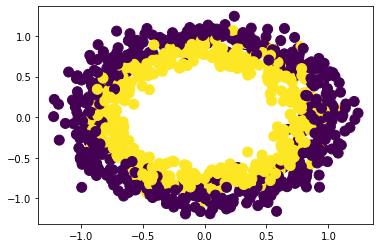

In [11]:
pyplot.scatter( X[:, 0], X[:, 1], c=y, s=100 )

In [12]:
# This is a good test problem because the classes cannot be separated by a line, e.g. are not linearly separable, 
# requiring a nonlinear method such as a neural network to address.

In [13]:
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [15]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [18]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.836, Test: 0.848


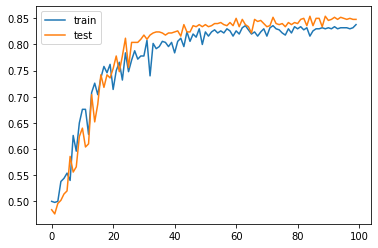

In [19]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend();

In [20]:
# In this case, we can see that the model achieved an accuracy of about 84% on the holdout dataset and achieved 
# comparable performance on both the train and test sets, given the same size and similar composition of both datasets.

# The plot shows comparable performance of the model on both datasets during the training process. 
# We can see that performance leaps up over the first 30-to-40 epochs to above 80% accuracy then is slowly refined.

# This result, and specifically the dynamics of the model during training, 
# provide a baseline that can be compared to the same model with the addition of batch normalization.

In [21]:
# The expectation is that the addition of batch normalization would accelerate the training process, offering similar or 
# better classification accuracy of the model in fewer training epochs. Batch normalization is also reported as providing a 
# modest form of regularization, meaning that it may also offer a small reduction in generalization error demonstrated by 
# a small increase in classification accuracy on the holdout test dataset.

In [23]:
from tensorflow.keras.layers import BatchNormalization

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [24]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [26]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.832, Test: 0.850


In [27]:
# we can see comparable performance of the model on both the train and test set of about 84% accuracy,
#  very similar to what we saw in the previous section, if not a little bit better.

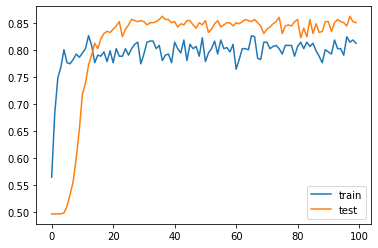

In [28]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend();

In [29]:
# In this case, we can see that the model has learned the problem faster than the model in the previous section without batch normalization.
# Specifically, we can see that classification accuracy on the train and test datasets leaps above 80% within the first 20 epochs, as 
# opposed to 30-to-40 epochs in the model without batch normalization.

# The plot also shows the effect of batch normalization during training. We can see lower performance on the training dataset than
#  the test dataset: scores on the training dataset that are lower than the performance of the model at the end of the training run. 
#  This is likely the effect of the input collected and updated each mini-batch.

In [30]:
# We can also try a variation of the model where batch normalization is applied prior to the activation 
# function of the hidden layer, instead of after the activation function.

In [32]:
from keras.layers import Activation

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [33]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [34]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.836, Test: 0.826


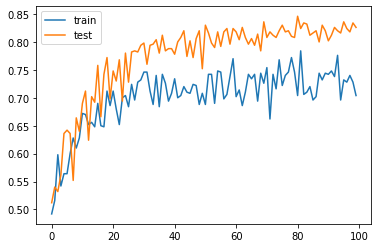

In [35]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend();

In [36]:
# In this case, we can see comparable performance of the model on the train and test datasets,
#  but slightly worse than the model without batch normalization.

In [37]:
# The line plot of the learning curves on the train and test sets also tells a different story.

# The plot shows the model learning perhaps at the same pace as the model without batch normalization, but the performance of 
# the model on the training dataset is much worse, hovering around 70% to 75% accuracy, again likely an effect of the statistics 
# collected and used over each mini-batch.

# At least for this model configuration on this specific dataset, it appears that batch normalization is more 
# effective after the rectified linear activation function.

In [38]:
# Extensions
# This section lists some ideas for extending the tutorial that you may wish to explore.

# Without Beta and Gamma. Update the example to not use the beta and gamma parameters in the batch normalization layer and compare results.
# Without Momentum. Update the example to not use momentum in the batch normalization layer during training and compare results.
# Input Layer. Update the example to use batch normalization after the input to the model and compare results.